In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv("gender_submission.csv")
df_tr = pd.read_csv('train.csv') 
df_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Missing Values

missing_col = [col for col in df_tr.columns
               if df_tr[col].isnull().any()]



a = df_tr['Age'].isna().sum()
b = df_tr['Fare'].isna().sum()
c = df_tr['Cabin'].isna().sum()

print(missing_col, b, a, c)

['Age', 'Cabin', 'Embarked'] 0 177 687


In [9]:
# Missing Values Solution

from sklearn.impute import SimpleImputer

my_imp1 = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
# df_tr['Cabin'] = my_imp1.fit_transform(df_tr[['Cabin']])
df_tr['Embarked'] = my_imp1.fit_transform(df_tr[['Embarked']])

my_imp2 = SimpleImputer(strategy = 'mean', missing_values = np.nan)
df_tr['Age'] = my_imp1.fit_transform(df_tr[['Age']])

# df_tr = df_tr.drop(['Cabin'], axis='columns')


df_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,C


In [10]:
missing_col = [col for col in df_tr.columns
               if df_tr[col].isnull().any()]

missing_col

[]

In [14]:
# Categorical Data

X = df_tr.copy()
y = X.pop('Survived')

for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()

discrete_features = X.dtypes == int

In [15]:
# MI Score

from sklearn.feature_selection import mutual_info_regression

def mi_score(X, y, discrete_features):
    mis = mutual_info_regression(X, y, discrete_features = discrete_features)
    mis = pd.Series(mis, name="MI_Score", index=X.columns)
    mis = mis.sort_values(ascending = False)
    return mis
mi = mi_score(X, y, discrete_features)

mi

Sex            0.134614
Ticket         0.080398
Pclass         0.074236
Embarked       0.068875
SibSp          0.066958
Fare           0.065362
Name           0.015989
PassengerId    0.013362
Parch          0.010987
Age            0.000000
Name: MI_Score, dtype: float64

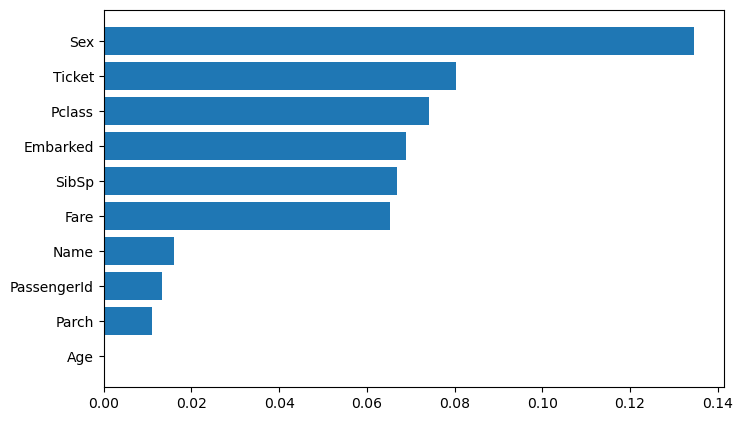

In [16]:
# Plotting MI Score

import matplotlib.pyplot as plt
import seaborn as sns

def plot_mi(score):
    score = score.sort_values(ascending = True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width, score)
    plt.yticks(width, ticks)
    
plt.figure(dpi=100, figsize=(8,5))

plot_mi(mi)

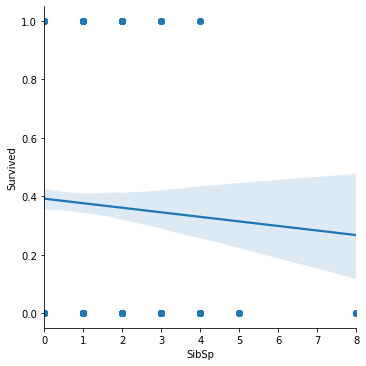

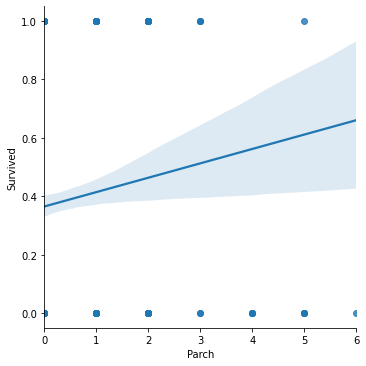

In [18]:
sns.lmplot(x="SibSp", y="Survived", data=df_tr);
sns.lmplot(x="Parch", y="Survived", data=df_tr);

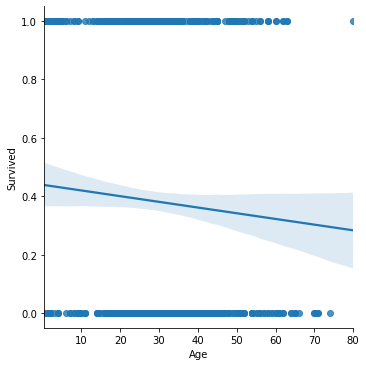

In [19]:
sns.lmplot(x="Age", y="Survived", data=df_tr);
# sns.lmplot(x="Age", y="Fare", data=df_tr);

In [20]:
df = df_tr#.drop(['Name', 'Parch', 'SibSp'], axis='columns')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,C


In [21]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,S


In [22]:
s = (df.dtypes == 'object')

obj_col = list(s[s].index)

obj_col

['Name', 'Sex', 'Ticket', 'Fare', 'Embarked']

In [34]:
df = df.drop(['Name', 'Ticket'], axis='columns')

In [37]:
s = (df.dtypes == 'object')

obj_col = list(s[s].index)

obj_col

['Sex', 'Fare', 'Embarked']

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
df1 = df.copy()

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
ohe_col = pd.DataFrame(ohe.fit_transform(df1[obj_col]))

ohe_col.index = df1.index

n_ohe = df.drop(obj_col, axis =1)

df1 = pd.concat([n_ohe, ohe_col], axis=1)

df1.columns = df1.columns.astype(str)


In [40]:
df1.to_csv('Preprocessed_1.csv', index=None)
df1.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,0,1,2,3,4,5,6,7
0,1,0,3,22.0,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,6,0,3,24.0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6,7,0,1,54.0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,8,0,3,2.0,3,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,9,1,3,27.0,0,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,10,1,2,14.0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
df2 = df.copy()

oe = OrdinalEncoder()

df2[obj_col] = oe.fit_transform(df2[obj_col])


In [43]:
df2.to_csv('Preprocessed_2.csv', index=None)
df2.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,2.0,2.0
1,2,1,1,0.0,38.0,1,0,0.0,0.0
2,3,1,3,0.0,26.0,0,0,2.0,2.0
3,4,1,1,0.0,35.0,1,0,2.0,2.0
4,5,0,3,1.0,35.0,0,0,2.0,2.0
5,6,0,3,1.0,24.0,0,0,1.0,1.0
6,7,0,1,1.0,54.0,0,0,2.0,2.0
7,8,0,3,1.0,2.0,3,1,2.0,2.0
8,9,1,3,0.0,27.0,0,2,2.0,2.0
9,10,1,2,0.0,14.0,1,0,0.0,0.0
